# Import Libraries

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='darkgrid')

# Define Directory path and Data Storage

In [41]:
directory_path = 'Data'  # Replace with your directory path

# Dictionary to hold each company's data
company_data = {}

# Read CSV Files and Store Data

In [42]:
for file in os.listdir(directory_path):
    if file.endswith(".csv"):
        try:
            # Read the CSV into a DataFrame
            df = pd.read_csv(os.path.join(directory_path, file))
            
            # Extract company code from the filename
            company_code = int(file.split(".")[0])
            
            # Store the DataFrame in the dictionary with the company code as the key
            company_data[company_code] = df
        except pd.errors.ParserError:
            print(f"Error parsing {file}. Skipping...")
            continue
        except pd.errors.EmptyDataError:
            print(f"File {file} is empty or has no valid data. Skipping...")


# Data Analysis for a Specific Company

In [43]:
# Choose a specific company code to analyze
company_code_to_analyze = 512301

# Get the DataFrame for the specific company
company_df = company_data.get(company_code_to_analyze)

# Display the first few rows of the DataFrame
company_df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,23-August-2023,4.28,4.28,4.28,4.28,4.28,1000,4,4280.0,1000.0,100.0,0.0,0.0
1,22-August-2023,4.28,4.28,4.28,4.28,4.28,1000,2,4280.0,1000.0,100.0,0.0,0.0
2,21-August-2023,4.50,4.50,4.50,4.50,4.50,4,1,18.0,4.0,100.0,0.0,0.0
3,17-August-2023,4.56,4.56,4.56,4.56,4.56,1000,2,4560.0,1000.0,100.0,0.0,0.0
4,14-August-2023,4.56,4.56,4.56,4.56,4.56,1050,5,4788.0,1050.0,100.0,0.0,0.0


# Convert Date Column to Datetime

In [44]:
# Convert 'Date' column to datetime
company_df['Date'] = pd.to_datetime(company_df['Date'], format='%d-%B-%Y')

# Set 'Date' as the index
company_df.set_index('Date', inplace=True)

# Statistical Summary

In [45]:
# Display the statistical summary of the company's data
company_df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1.744000e+03,1737.000000,1737.000000,1744.000000,1744.000000
mean,7.016290,7.174042,6.698297,6.945052,6.905257,21858.292431,38.724771,2.996713e+05,14659.679332,90.863172,0.475745,-0.071239
std,4.889885,5.027955,4.550567,4.800753,4.794491,52129.233925,79.550299,8.497794e+05,31515.696643,17.207839,0.702848,0.506847
min,1.000000,1.050000,1.000000,1.050000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,9.360000,0.000000,-5.150000
25%,2.830000,2.900000,2.767500,2.830000,2.801969,339.250000,3.000000,1.278000e+03,316.000000,89.440000,0.000000,-0.110000
50%,5.660000,5.750000,5.565000,5.700000,5.700000,2097.500000,9.000000,9.253000e+03,2000.000000,100.000000,0.155000,0.000000
75%,10.000000,10.257500,9.500000,9.900000,9.804179,13208.000000,35.000000,1.011300e+05,11530.000000,100.000000,0.720000,0.010000
max,21.750000,22.180000,20.950000,21.350000,21.394437,589106.000000,870.000000,1.023214e+07,317679.000000,100.000000,5.150000,3.830000


# Data Visualization - Closing Prices Over Time

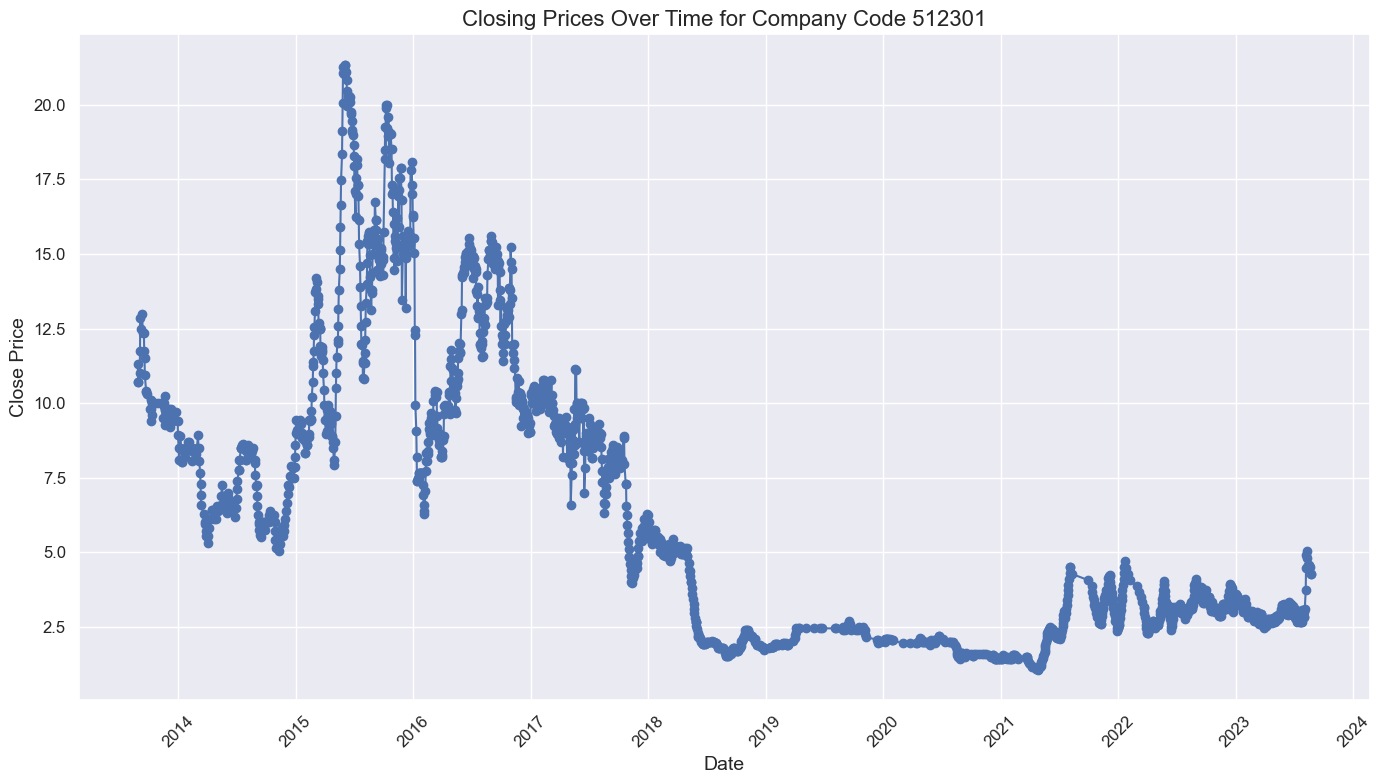

In [46]:
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(company_df.index, company_df['Close Price'], marker='o', linestyle='-', color='b')
plt.title(f'Closing Prices Over Time for Company Code {company_code_to_analyze}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

# Data Visualization - Volume Traded Over Time

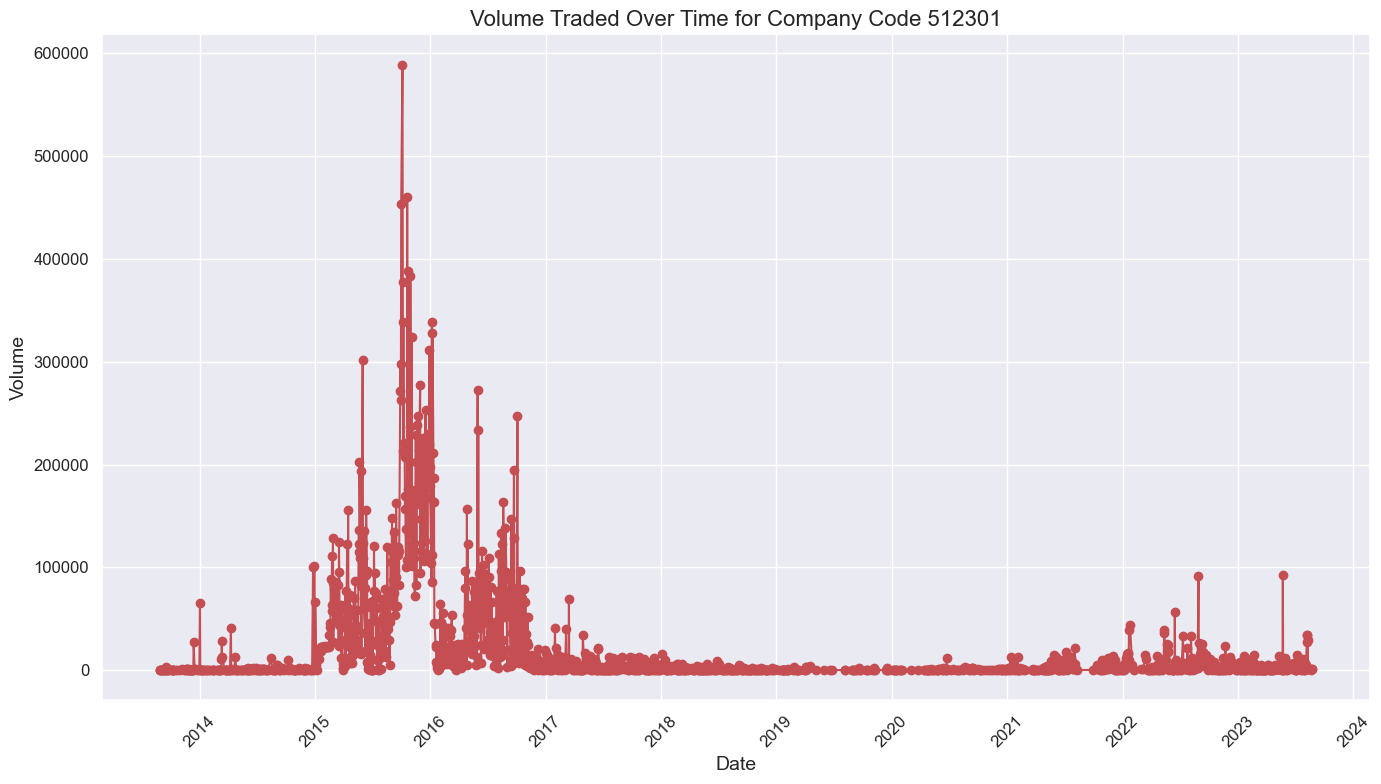

In [47]:
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(company_df.index, company_df['No.of Shares'], marker='o', linestyle='-', color='r')
plt.title(f'Volume Traded Over Time for Company Code {company_code_to_analyze}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

# Correlation Matrix

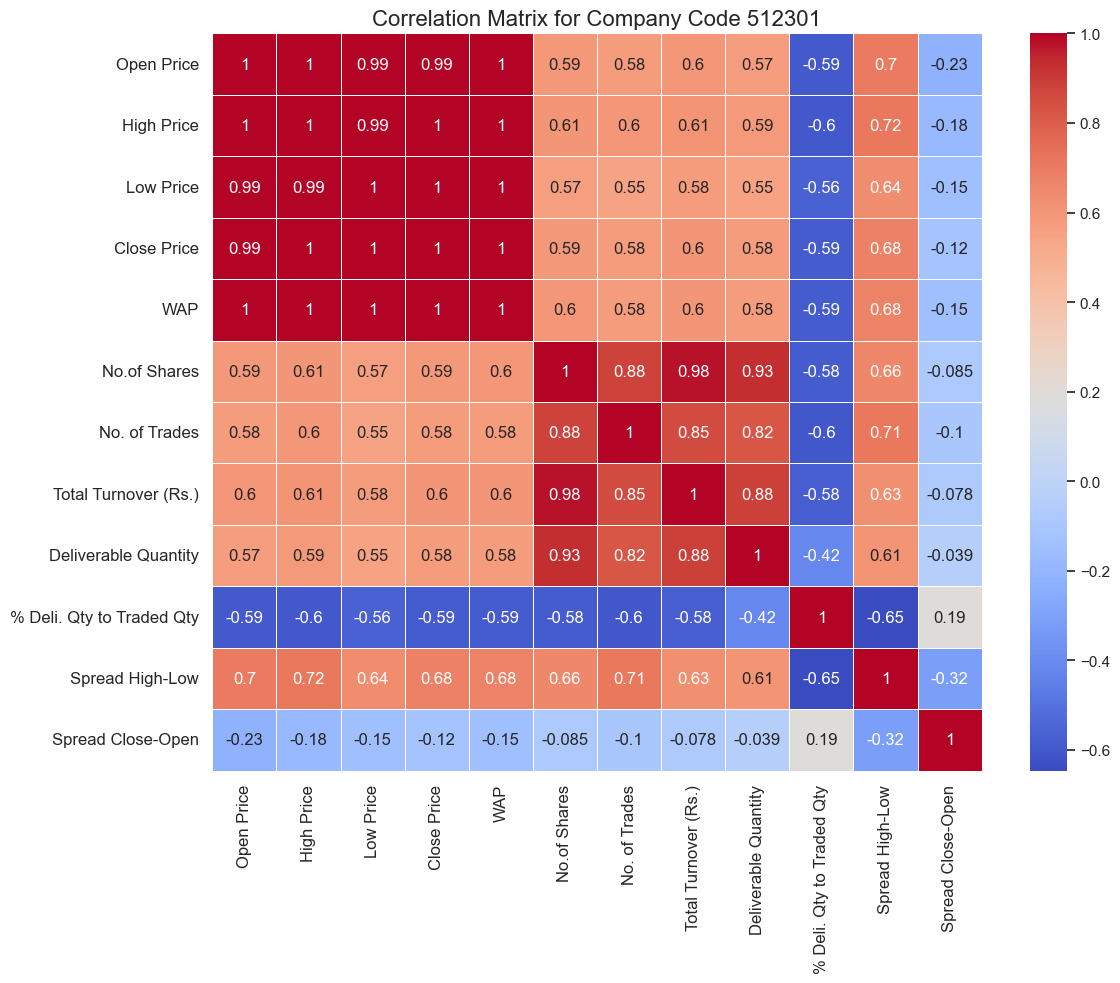

In [48]:
plt.figure(figsize=(12, 10))  # Increase figure size
correlation_matrix = company_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix for Company Code {company_code_to_analyze}', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

# Monthly Average Closing Prices

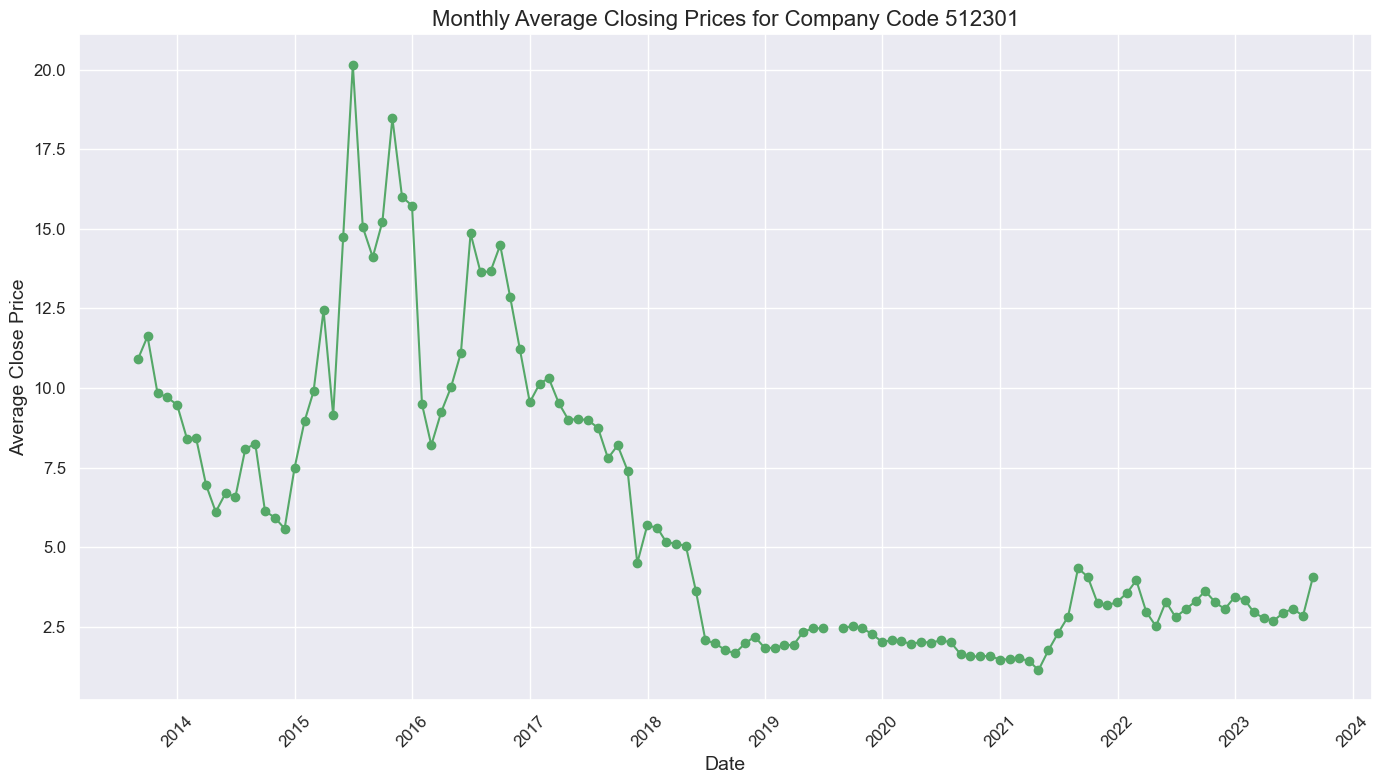

In [50]:
# Resample the data by month and calculate the mean closing prices
monthly_avg_close = company_df['Close Price'].resample('ME').mean()

# Plot the monthly average closing prices
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(monthly_avg_close.index, monthly_avg_close, marker='o', linestyle='-', color='g')
plt.title(f'Monthly Average Closing Prices for Company Code {company_code_to_analyze}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()